In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats 

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<h1>
For the "Median value of owner-occupied homes" provide a boxplot</h1>

Text(0.5, 1.0, 'Median value of owner-occupied homes')

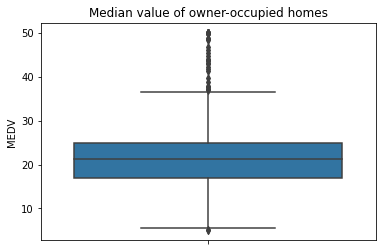

In [3]:
#
x = sns.boxplot(y='MEDV', data=boston_df)
x.set_title("Median value of owner-occupied homes")



<h1>Provide a bar plot for the Charles river variable</h1>

Text(0.5, 1.0, 'Charles River')

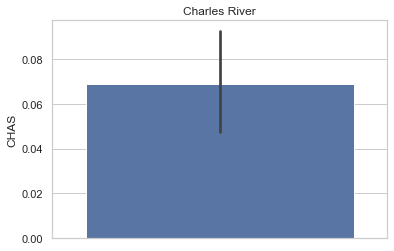

In [4]:
sns.set(style="whitegrid")
ax = sns.barplot( y="CHAS", data=boston_df)
ax.set_title("Charles River")

<h1>Provide a boxplot for the MEDV variable vs the AGE variable. </h1>

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

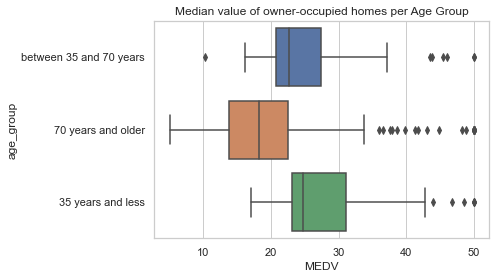

In [17]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and less'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
bx = sns.boxplot(x='MEDV', y='age_group',data=boston_df)
bx.set_title('Median value of owner-occupied homes per Age Group')

bx = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
bx.set_title('Median value of owner-occupied homes per Age Group')


<h1>Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?</h1>



Text(0.5, 1.0, 'Nitric oxide concentration / proportion of non-retail business acres per town')

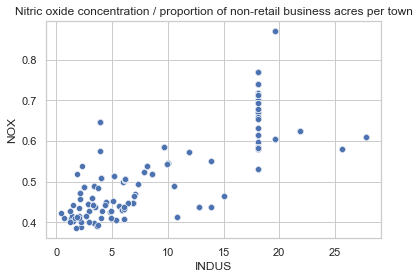

In [7]:
cx = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
cx.set_title('Nitric oxide concentration / proportion of non-retail business acres per town')


<h1>Create a histogram for the pupil to teacher ratio variable</h1>

Text(0.5, 0.98, 'Pupil to teacher ratio per town')

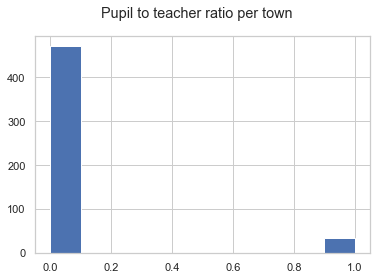

In [8]:
dx = plt.hist(boston_df['CHAS'])
plt.suptitle('Pupil to teacher ratio per town')

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

<h1>Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)</h1>

In [9]:
# Null hypothesis (H0): There is no significant difference between median values
#Alternative hypothesis (H1): There is a significant difference between median values

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] ==1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

#p-value lower than 0.05 = we fail the null hypothesis

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

<h1>Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)</h1>

In [19]:
# Null hypothesis (H0):There are no significant difference between Median values
# Aletrnative hypothesis (H1): There are significant difference between Median values

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and less']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

# p-value higher than 0.05 = fail to reject the null hypothesis

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

<h1>Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)</h1>

In [21]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Pearson Coefficient = 0.7636 indicating a significant positive correlation 

(0.763651446920915, 7.913361061239593e-98)

<h1>What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</h1>

In [23]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

#DIS: 1.0916 indicates an increased value with regards to an additional weighted distance to the five employment centers 1.0916 the median value of owner occupied homes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        20:05:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""